## **EDA dataset Amazon's Top 50 bestselling books from 2009 to 2019** 





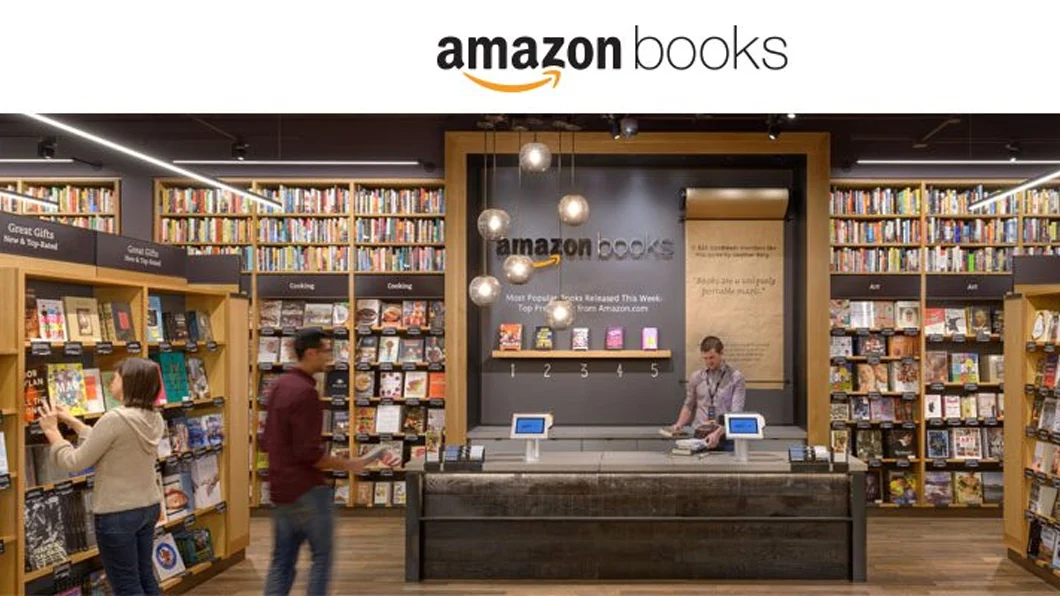

## **1 - Prólogo** 
Neste notebook, será realizada uma análise exploratória de dados com os 50 livros mais vendidos pela amazon no periódo de 2009 a 2019.


**Atributos :** 


*   **Name** -  Título do EBOOK.
*   **Author** - Autor do EBOOK.
*  **User Rating** - Amazon User Rating - (popularidade)
*   **Reviews** -  Número de reviews no site da amazon.
*   **Price** - valor do EBOOK.
*   **Year**  - Ano de lançamento.
*   **Genre** - gênero do EBOOK






###**Importação das bibliotecas**

In [2]:
import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### **2.Data clear e Data preparation**

Nesta bloco , iremos entender os tipos dos dados, valores missing , dados duplicados , insconsistências e entender as medidas de posição central.

2.1. Data Types

In [3]:
# Carregando o dataset
cam = '/content/drive/MyDrive/Colab Notebooks/AED/bestsellers with categories.csv'
df = pd.read_csv(cam)

In [4]:
# Visualizando as cinco primeiras linhas do dataset
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [5]:
#  Número de linhas e colunas
print(f'O dataset apresenta {df.shape[0]} registros e {df.shape[1]} atributos')

O dataset apresenta 550 registros e 7 atributos


In [6]:
# Verificando as colunas 
print(f'o dataset apresenta as seguintes colunas : {df.columns}')

o dataset apresenta as seguintes colunas : Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')


In [7]:
# Verificando os tipos de dados 
df.dtypes

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object

É possível observar que temos quatros atributos numéricos e três  categóricos. Vamos converter a coluna Genre para um tipo catgórico para facilitar as análises futuras. 

In [8]:
# Convertendo a variável 
df['Genre']  = df['Genre'].astype('category')

2.2. Missing Values

In [ ]:
# Somando os valores nulos
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

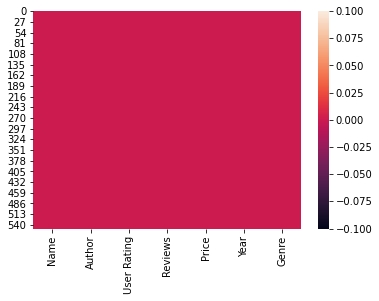

In [ ]:
# visualizando valores nulos
sns.heatmap(df.isnull())

Como o nosso dataset não apresentou nenhum valor nulo , não se faz necessário nenhuma interpolação. 

2.3. Valores duplicados 

In [9]:
# Distinguindo as variáveis  categóricas das numéricas
colunas_categoricas = list(df.select_dtypes(exclude= ('int', 'float')).columns)

In [10]:
# Colunas categóricas 
print(f'As colunas categóricas do nosso data set são: { ", ".join(colunas_categoricas)  } ')

As colunas categóricas do nosso data set são: Name, Author, Genre 


In [11]:
# Verificando duplicates
for col in colunas_categoricas:
  if df[col].duplicated().any() == True:
    print(f'A coluna {col} possue valores duplicados')
  else:
    print(f'A coluna {col} não possue valores duplicados')

A coluna Name possue valores duplicados
A coluna Author possue valores duplicados
A coluna Genre possue valores duplicados


Agora que sabemos que temos valores duplicatos, devemos investigar quais e como proceder 

In [12]:
#  Verificando se há erros diferenças ortográfricas  e espaços excessivos entre os nomes 
for col in colunas_categoricas:
  print(f'Antes {col} : {len(set(df[col]))} , Depois {col} : { len(set(df[col].str.title().str.strip())) } ')

Antes Name : 351 , Depois Name : 350 
Antes Author : 248 , Depois Author : 248 
Antes Genre : 2 , Depois Genre : 2 


A coluna Name apresentou alguns erros, então é necessário corrigi-los

In [13]:
# Corrigindo os erros padronizando os caracteres
df['Name'] = df['Name'].str.title().str.strip()

In [15]:
# Analisando a Variável Name 
query =df['Name'].duplicated()
df[query].sort_values( by = 'Author').head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
57,Cutting For Stone,Abraham Verghese,4.6,4866,11,2011,Fiction
70,Diagnostic And Statistical Manual Of Mental Di...,American Psychiatric Association,4.5,6679,105,2014,Non Fiction
277,Publication Manual Of The American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction
276,Publication Manual Of The American Psychologic...,American Psychological Association,4.5,8580,46,2014,Non Fiction
275,Publication Manual Of The American Psychologic...,American Psychological Association,4.5,8580,46,2013,Non Fiction
274,Publication Manual Of The American Psychologic...,American Psychological Association,4.5,8580,46,2012,Non Fiction
273,Publication Manual Of The American Psychologic...,American Psychological Association,4.5,8580,46,2011,Non Fiction
272,Publication Manual Of The American Psychologic...,American Psychological Association,4.5,8580,46,2010,Non Fiction
279,Publication Manual Of The American Psychologic...,American Psychological Association,4.5,8580,46,2017,Non Fiction
280,Publication Manual Of The American Psychologic...,American Psychological Association,4.5,8580,46,2018,Non Fiction


é possível observar que temos livros com o mesmo título , porém foram lançados em anos diferentes, o que nos indica que podem ser edições diferentes de um mesmo exemplar. 

In [16]:
# Analisando a variável Author
df['Author'].sort_values().unique()

array(['Abraham Verghese', 'Adam Gasiewski', 'Adam Mansbach', 'Adir Levy',
       'Admiral William H. McRaven', 'Adult Coloring Book Designs',
       'Alan Moore', 'Alex Michaelides', 'Alice Schertle', 'Allie Brosh',
       'American Psychiatric Association',
       'American Psychological Association', 'Amor Towles', 'Amy Ramos',
       'Amy Shields', 'Andy Weir', 'Angie Grace', 'Angie Thomas',
       'Ann Voskamp', 'Ann Whitford Paul', 'Anthony Bourdain',
       'Anthony Doerr', 'Atul Gawande', 'Audrey Niffenegger',
       'B. J. Novak', 'Bessel van der Kolk M.D.', 'Bill Martin Jr.',
       "Bill O'Reilly", 'Bill Simmons', 'Blue Star Coloring',
       'Bob Woodward', 'Brandon Stanton', 'Brené Brown',
       'Brian Kilmeade', 'Bruce Springsteen', 'Carol S. Dweck',
       'Celeste Ng', 'Charlaine Harris', 'Charles Duhigg',
       'Charles Krauthammer', 'Cheryl Strayed', 'Chip Gaines',
       'Chip Heath', 'Chris Cleave', 'Chris Kyle', 'Chrissy Teigen',
       'Christina Baker Kline', 

Os autores George R.R. Martin',  J.K. Rowling' estão como duplicidade por conta de alguns registros com excesso de espaço entre o nome.

In [17]:
# Renomeando os nome 
df = df.replace('George R. R. Martin', 'George R.R. Martin')
df = df.replace('J. K. Rowling', 'J.K. Rowling')

In [18]:
# Analisando novamente o número de registros únicos
for col in colunas_categoricas:
  print(f'Antes {col} : {len(set(df[col]))} , Depois {col} : { len(set(df[col].str.title().str.strip())) } ')

Antes Name : 350 , Depois Name : 350 
Antes Author : 246 , Depois Author : 246 
Antes Genre : 2 , Depois Genre : 2 


In [19]:
# Analisando a variável Genre
df.Genre.sort_values().unique()

['Fiction', 'Non Fiction']
Categories (2, object): ['Fiction', 'Non Fiction']

A variável categórica gênero está de acordo.

Conclusão : temos 350 livros escritos por 246 autores, em que cada livro encontra-se no gênero Ficção ou não Ficção.

### 3. Varáveis Categóricas

Vamos analisar a varável Gênero, ela pode ser categorizada em ficção ou não, sendo um atributo de suma importância para entedermos o tipo de livro que está em alta nos últimos anos. 
 

Text(0.5, 1.0, 'Número de Livros por Gênero')

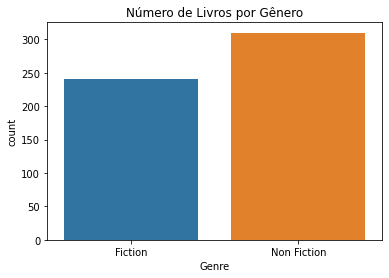

In [20]:
aux = sns.countplot(x = 'Genre' , data= df)
aux.set_title('Número de Livros por Gênero')

O gráfico mostra que há uma pariedade no número de exemplares escritos por gênero, apresentando os livros de 'Non Fiction' uma leve superioridade.

Text(0.5, 1.0, ' Média de Reviews x  Gênero')

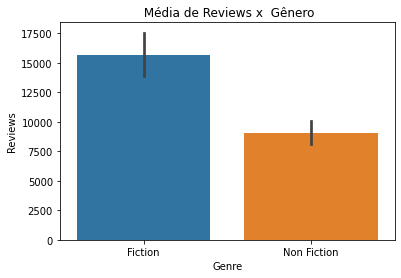

In [21]:
aux1 = sns.barplot( x = 'Genre' , y = 'Reviews' , data = df)
aux1.set_title(" Média de Reviews x  Gênero")

O gráfico mostra a média de Reviews por gênero e a linha preta indica o desvio padrão de cada categoria, é possível observar que a ficção aprenta uma maior média em relação ao de não ficção. Possuindo também uma maior desvio padrão. O que indica que os dados Reviews apresentam uma maior variabilidade no gênero ficção. 

**Análise I** - Posição central das variáveis 

In [22]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


A variável preco apresenta uma média de 13,10 porém ela não representa a realidade, uma vez que sua mediana possui o valor de  11, 00 , concentrando a maioria dos dados com esse valor. 

 Análisando a distribuição de frequência da variável price ( preço ) : 

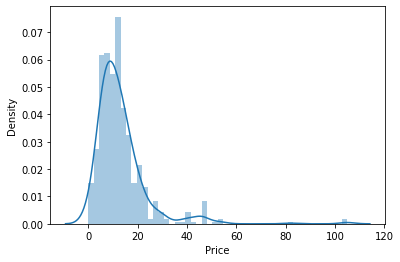

In [23]:
sns.distplot(df['Price'] , kde = True  )

Nesse gráfico, podemos observar que a variável preço apresenta a maior parte dos valores concentrado no início do gráfico, o que indica que não temos uma distribuição normal, mas sim uma variável assimétrica à direita, o que nos indica que alguns exemplares estão tornando a variável viesáda à direita devido ao seus valores alto. 

In [ ]:
df.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

**Análise II** - Analisando o comportamento da variável categórica genre (gênero)

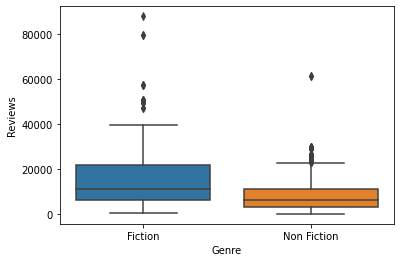

In [ ]:
sns.boxplot( x = 'Genre' , y = 'Reviews', data= df)

Nesse bloxplot ( Reviews x Genre), é possível observar que há uma maior variação entre o gênero ficção. Apresentando  uma faixa de amplitude entre 0 e 40000 para número de reviews. Além diss, há alguns outlieres no nosso dataset, vamos identificá-los. 

In [27]:
filtro = (df['Reviews'] > 40000 ) & (df['Genre'] == 'Fiction') 
df[filtro]

,Name,Author,User Rating,Reviews,Price,Year,Genre
106,Fifty Shades Of Grey: Book One Of The Fifty Sh...,E L James,3.8,47265,14,2012,Fiction
107,Fifty Shades Of Grey: Book One Of The Fifty Sh...,E L James,3.8,47265,14,2013,Fiction
135,Gone Girl,Gillian Flynn,4.0,57271,10,2012,Fiction
136,Gone Girl,Gillian Flynn,4.0,57271,10,2013,Fiction
137,Gone Girl,Gillian Flynn,4.0,57271,9,2014,Fiction
365,The Fault In Our Stars,John Green,4.7,50482,13,2012,Fiction
366,The Fault In Our Stars,John Green,4.7,50482,13,2013,Fiction
367,The Fault In Our Stars,John Green,4.7,50482,7,2014,Fiction
368,The Fault In Our Stars,John Green,4.7,50482,13,2014,Fiction
382,The Girl On The Train,Paula Hawkins,4.1,79446,18,2015,Fiction


Os valores que apresentaram um elevado número de Reviews foram livros bastante populares globalmente, como 'The Fault In Our Stars' , 'Gone Girl'.

**Análise III** - Correlações entre as variáveis


In [29]:
df.corr()



,User Rating,Reviews,Price,Year
User Rating,1.000000,-0.001729,-0.133086,0.242383
Reviews,-0.001729,1.000000,-0.109182,0.263560
Price,-0.133086,-0.109182,1.000000,-0.153979
Year,0.242383,0.263560,-0.153979,1.000000


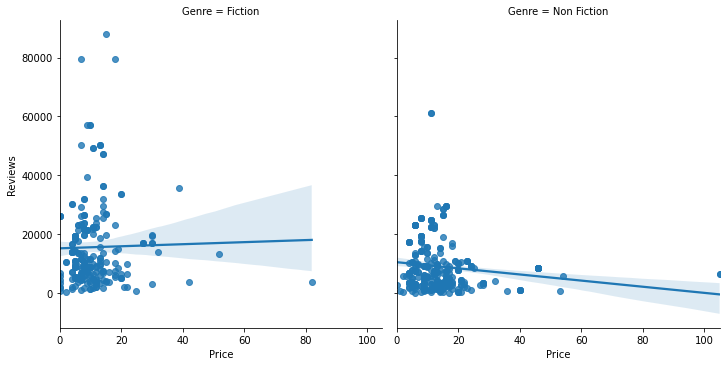

In [37]:
# Correlação Linear entre Reviews x Price
sns.lmplot(data = df , y = 'Reviews' , x='Price', col = 'Genre')

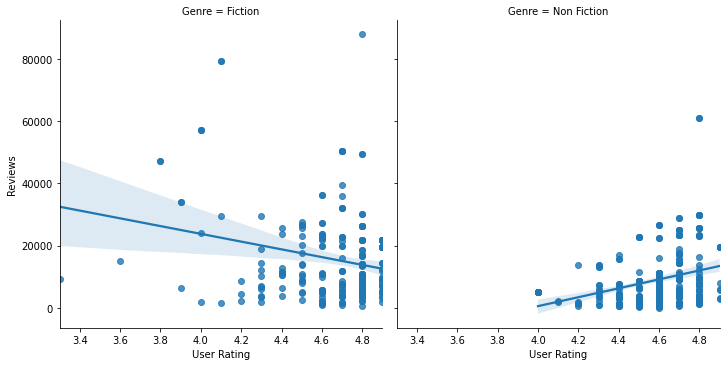

In [38]:
# Correlação Linear entre Reviews x Rating
sns.lmplot(data = df , y = 'Reviews' , x='User Rating', col = 'Genre')

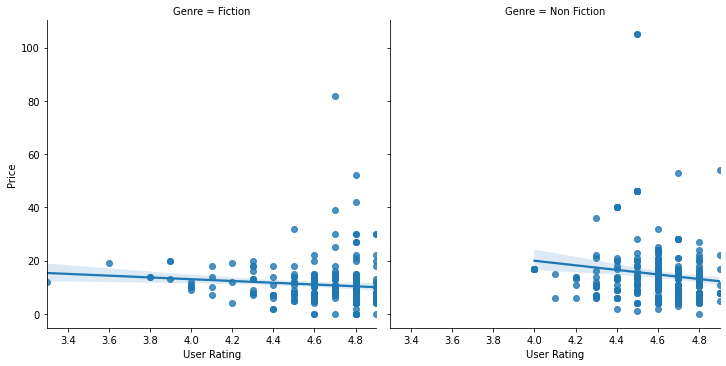

In [39]:
# Correlação entre as variáveis Price X User Rating 
sns.lmplot(data = df , y = 'Price' , x='User Rating')

De acordo com a análise das correlações, as variáveis Reviews, Price e User Rating não apresentaram nenhum correlação, seja positiva ou negativa. Logo, não é possível utilizar um modelo de regresão entre elas.